# <strong>Cyfrowe Przetwarzanie Sygnałów</strong>

**Laboratorium nr 11 Dźwięk**
 
prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat, mgr
inż. Artur Kos

Python/colab:  Miłosz Janeczek

---

# 1. Koder dźwięku DPCM (2+0.5 pkt) 
Schemat układu kodera i dekodera, realizującego kompresję DPCM (ang. Differential Pulse Code
Modulation) ze współczynnikiem predykcji a zamieszczono poniżej.\
Równania:

```
Koder:    d[n] = x[n] – a*x[n-1]    dq = quantize(d);
Dekoder:  y[n] = dq[n] + a*y[n-1] ← tu jest rekurencja !!!
```

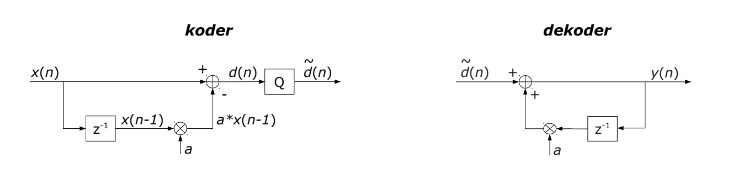

Uzupełnij poniższy kod źródłowy o dekoder. Porównaj sygnał oryginalny $x(n)$ z sygnałem
zrekonstruowanym $y(n)$. Następnie ogranicz rozdzielczość sygnału $d(n)$ do 16 stanów (4 bity), na
których reprezentowany jest sygnał dq. W tym celu napisz funkcję `lab11_kwant(...)`. Do
poprawnego wykonania kwantyzacji najpierw trzeba wyznaczyć minimalną i maksymalną wartość
danych w wektorze d. Porównaj błędy rekonstrukcji dla obu przypadków.

In [ ]:
import gdown
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt

def code(date, a):
    return x - a*np.append([0], x[:-1])

def quantize(date, no_bits):
    # TODO
    pass

def decode(date, a):
    # TODO
    pass

gdown.download('https://drive.google.com/uc?id=12pbgnxWomjbKLq9rdJZYyiakeqbYKW1I', 'DontWorryBeHappy.wav', quiet=True)
_, x = wavfile.read('DontWorryBeHappy.wav')

x = x[:, 0] # jeden kanał
x = x / max(x)
a = 0.9545
q = 4

d = code(x, a)
dq = quantize(d, q)
y = decode(dq, a)

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.plot(y)
plt.show()

# 2. Transformacyjne kodowanie dźwięku (3+0.5 pkt)
Jedną z możliwości kodowania dźwięku jest kodowanie transformacyjne (np. stosowane w koderze
AAC – Advanced Audio Coding, np. w radiofonii DAB+). Jego schemat blokowy, wykorzystujący
zmodyfikowaną transformatę DCT (MDCT czyli: Modified DCT) przedstawiono na poniższym rysunku. \
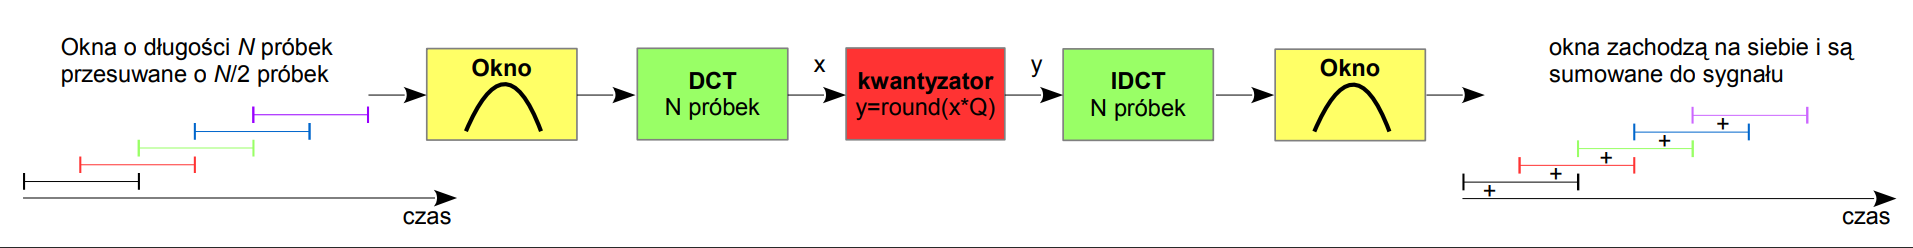
Okno analizy i syntezy ma postać:

$$
h(n) = sin \left( \frac{n+0.5}{N} \right) \text{, gdzie:  } n=0, 1, 2, ... N-1
$$

Odpowiednio wyskalowana macierz analizy $A$ dla $N$-punktowej transformaty MDCT (o wymiarach $N/
2 x N)$ jest dana wzorem (patrz (21.41) na str. 621 w [TZ2005] dla $K=N/2$):

$$[A]_{km}=\sqrt{\frac{4}{N}}cos \left( \frac{2\pi}{N}(k+0.5)(n+0.5+\frac{N}{4}) \right),$$

gdzie $k=0,1,2,...,N/2-1, n=0, 1, 2, ..., N-1$. Macierz syntezy $S$ transformacji MDCT jest uzyskiwana przez transpozycję macierzy analizy $A$. 

Zauważ, że podczas rekonstrukcji sygnału wynikowego, sąsiednie okna nakładają się na siebie.
Pojedyncza próbka sygnału wyjściowego jest więc sumą odpowiednich próbek z dwóch sąsiednich
okien. 

Wykonaj koder dla $N=32$ i $N=128$. Sprawdź czy kodowanie może być bezstratne dla odpowiednio
dużego $Q$. Wybierz taką wartość $Q$, aby dla monofonicznego sygnału próbkowanego z częstotliwością
$fs=44100$ Hz uzyskać strumień bitów o przepływności 64 kbps. Do testów użyj próbki
`DontWorryBeHappy.wav`.

**Opcjonalnie** (+0.25 pkt): zmodyfikuj koder i dekoder tak, aby dynamicznie przyporządkowywał on liczbę bitów na każdy współczynnik transformaty w każdej ramce. Załóż, że im większa wartość
współczynnika, tym jest on ważniejszy i powinien zostać zakodowany na większej liczbie bitów.
Informację o liczbie bitów wyznaczaj na podstawie współczynników transformaty za okres 100 ms.
Możesz wykonać dwuprzebiegowy koder – w pierwszym etapie wyznacz mapę współczynników
kwantyzacji. W drugim wykonaj kwantyzację.

**Opcjonalnie** (+0.25pkt): Podczas kompresji sygnału audio głoski dźwięczne są przetwarzane z
dłuższym oknem (w standardzie AAC $N=2048$), a głoski szumowe z krótszym (AAC: $N=512$).
W przypadku braku kwantowania współczynników transformacji DCT opisane powyżej
przekształcenie sygnału (analiza-synteza) może zapewnić jego dokładne odtworzenie także w
przypadku dynamicznej zmiany długości okna (np. 2048-->256 i 256-->2048). Zaprojektuj okna
„przejściowe” dla przypadku rozpatrywanego w ćwiczeniu: 128-->32 i 32-->128 (patrz str. 622 w
[TZ2005]). Kilka razy wykonaj zmianę długości okna w trakcie analizy-syntezy. Porównaj sygnały
przed i po transformacji. Czy otrzymałeś to samo? Powinieneś.

In [ ]:
from scipy.io import wavfile
import gdown

gdown.download('https://drive.google.com/uc?id=12pbgnxWomjbKLq9rdJZYyiakeqbYKW1I', 'DontWorryBeHappy.wav', quiet=True)
_, x = wavfile.read('DontWorryBeHappy.wav')


#3. Podpasmowe kodowanie dźwięku (+1 pkt)
Wykorzystując uproszczony schemat podpasmowego kodowania dźwięku z przykładu 15.1 [1], zamieszczonego na stronie http://teledsp.kt.agh.edu.pl/15/ (`kodowanie_podpasmowe.m`), wykonaj kompresję i dekompresję fragmentu nagrania `DontWorryBeHappy.wav`. Wybierz fragment, zawierający dźwięki tonalne oraz szumowe (nie przetwarzaj całej próbki – trwa to za długo). 

(**+0.25 pkt**) Wykonaj kodowanie w wariantach:
- 8 podpasm, 6 bitów na każde podpasmo,
- 32 podpasma, 6 bitów na każde podpasmo,
• 32 podpasma, zmienna liczba bitów, kolejno: 8, 8, 7, 6, (4).

Dla każdego z powyższych wariantów wyznacz spektrogram PRZED oraz PO cyklu kompresja- dekompresja. Porównaj spektrogramy, wskaż który jest bardziej zniekształcony. Na spektrogramie i na wykresie próbek dźwięku (PCM) wskaż elementy tonalne i szumowe.

Oblicz kompresję (w sensie redukcji liczby bitów) sygnału dla powyższych wariantów.

**Przykładowe wyniki**:\
Porównanie spektogramów (od góry: oryginalny fragment, 32 podpasma i 6 bitów na podpasmo, 32 podpasma i różne liczby bitów na podpasmo i 8 podpasm po 6 bitów na podpasmo):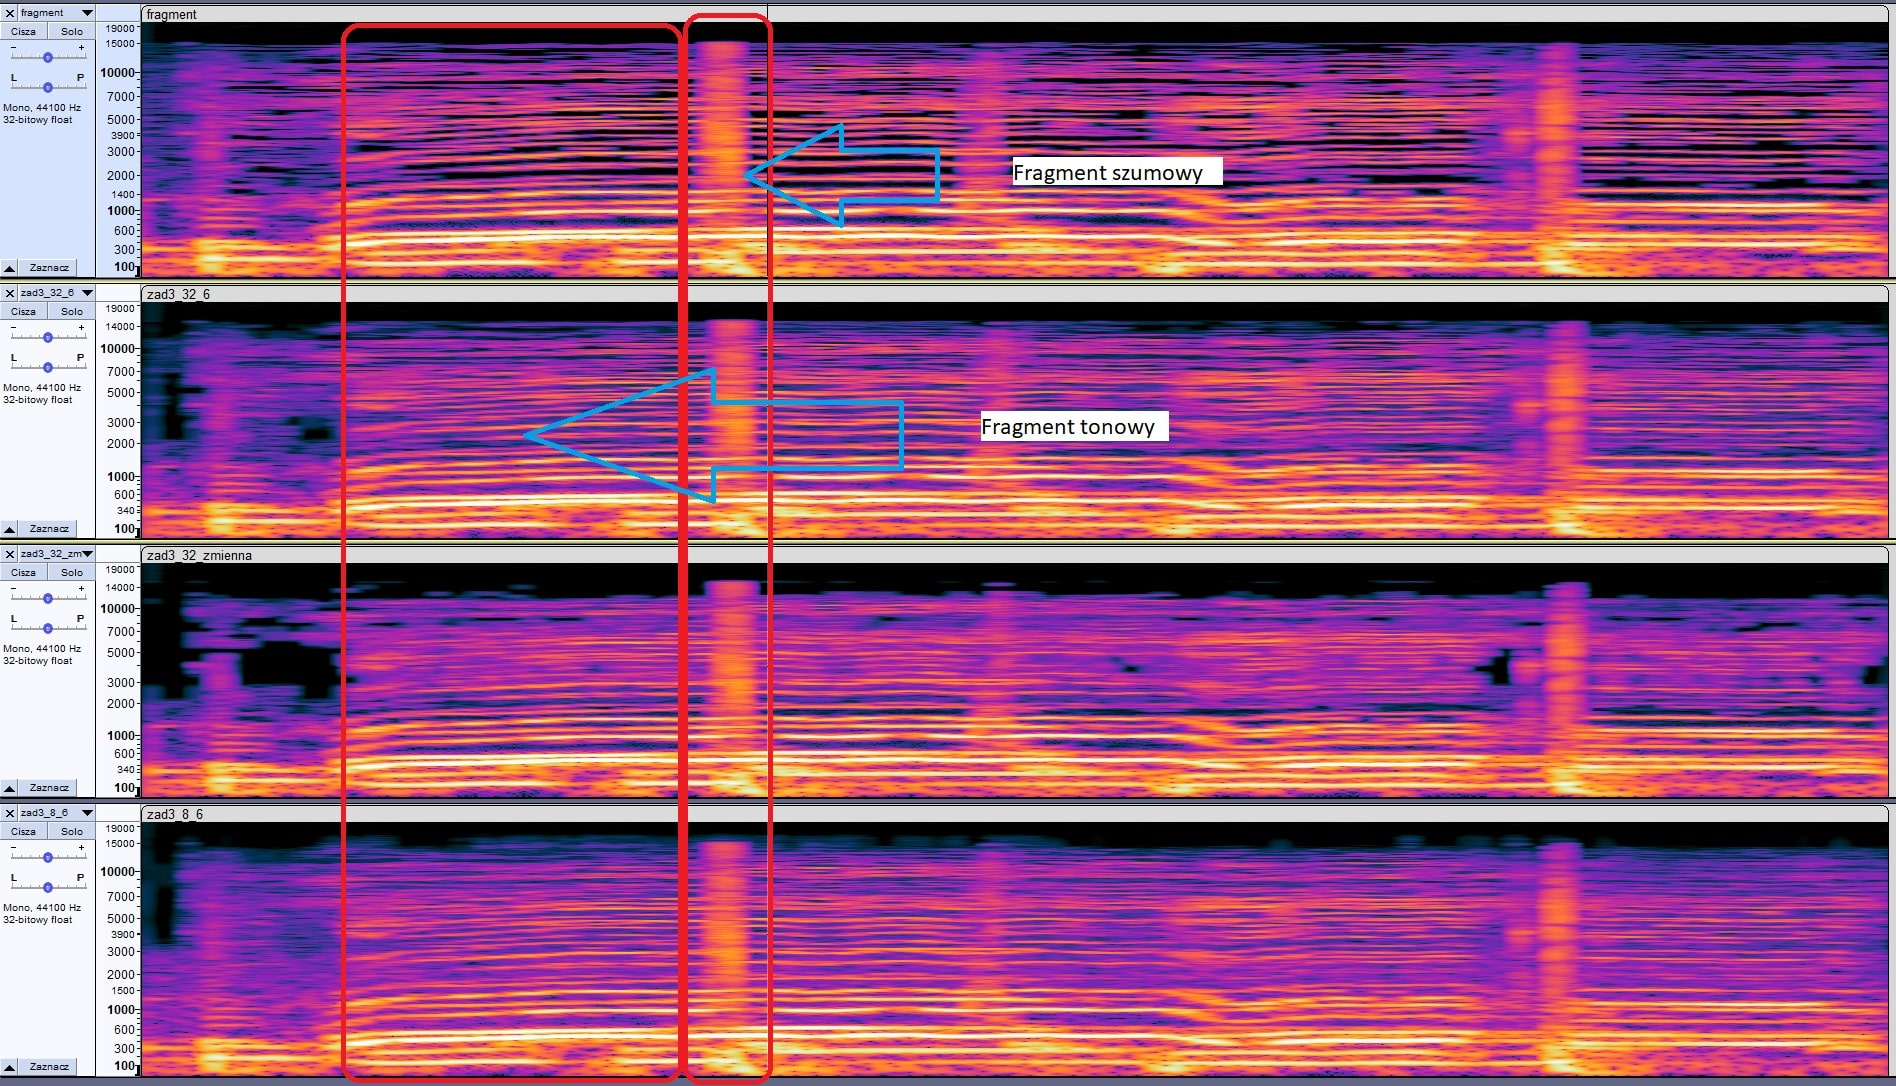\
Porównanie wykresów próbek PCM:\
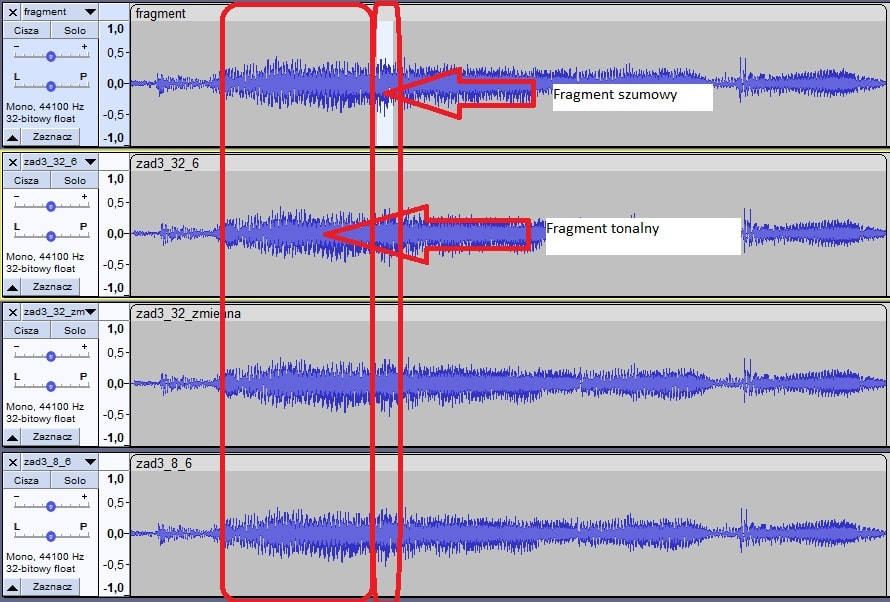\
Najbardziej zniekształcony jest spektogram wersji z 8 podpasmami i 6 bitami na podpasmo.

(**+0.75 pkt**) Zmodyfikuj koder i dekoder tak, aby dynamicznie przyporządkowywał on liczbę bitów
na każde podpasmo w każdej ramce. Załóż, że im większa energia sygnału w danym podpaśmie,
tym sygnał w tym podpaśmie jest ważniejszy i dlatego powinien zostać zakodowany na większej
liczbie bitów. Informacja o liczbie bitów w każdym podpaśmie musi zostać przesłana z kodera do
dekodera.

# 4. Szacowanie ilości informacji – Entropia (+0.25 pkt)
**Entropię**, definiowaną jako miarę informacji, można zastosować do obliczenia minimalnej liczby
bitów, potrzebnej do zakodowania jednego symbolu, należącego do zadanego ciągu symboli (np.
próbek sygnału mowy, dźwięku, etc...). W ten sposób można oszacować graniczne możliwości
algorytmów kompresji danych. Shannon zdefiniował ww. minimalną liczbę bitów na pojedynczy
symbol w następujący sposób:\
$$H(x) = -\sum_{n=1}^{N}\mathrm{p}_{n}^{}log_{2}p_{n}$$\
gdzie $p_n$ to prawdopodobieństwo zajścia zdarzenia (symbolu) $n$, natomiast $N$ to liczba wszystkich
zdarzeń (symboli) w ciągu (komunikacie) $x$.
Oblicz minimalną liczbę bitów informacji przypadającą na pojedynczy symbol dla następujących
sygnałów:\
```
x1 = [ 0, 1, 2, 3, 3, 2, 1, 0 ]
x2 = [ 0, 7, 0, 2, 0, 2, 0, 7, 4, 2 ]
x3 = [ 0, 0, 0, 0, 0, 0, 0, 15 ]
```
W tym celu:
- dla każdego ciągu x znajdź unikalne symbole pn,
- oblicz prawdopodobieństwo każdego z symboli pn,
- oblicz H(x).

Dla przykładu, w sekwencji `[ 0, 7, 0, 2, 0, 2, 0, 7, 4, 2 ]`:
- unikalne symbole to: ,,0'', ,,2'', ,,7'' i ,,4'',
- prawdopodobieństwa wystąpienia tych symboli: $p_1=0.4, p_2=0.3, p_3=0.2, p_4=0.1$.


# 5. Koder huffmana
Kodowanie Huffmana jest jedną z bezstratnych metod kompresji (ich przykłady to ZIP, RAR,
ARJ,...). Jest ono często stosowane po kwantyzacji w końcowym etapie kompresji dźwięku, np. w
standardzie MP3. Drzewo Huffmana dla tego ciągu danych o prawdopodobieństwie występowania
symboli: $p_1=0.4, p_2=0.3, p_3=0.2, p_4=0.1$ będzie konstruowane w 3 krokach. W każdym kroku łączymy symbole
o dwóch najmniejszych prawdopodobieństwach wystąpienia:
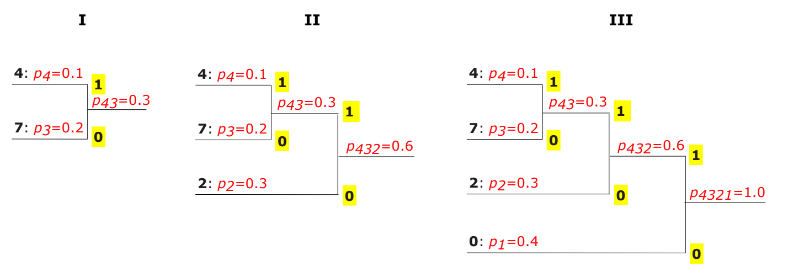\
Przyporządkuj słowa kodowe (sekwencje bitowe) wszystkim symbolom (są to kolejne bity leżące na ścieżce od pnia drzewa do danego symbolu). Przykładowo, dla symbolu „2” mamy sekwencję bitową „10”. Zakoduj sygnał `x2` strumieniem bitów, korzystając z wyznaczonych słów kodowych. Nie musisz pisać kodu w tym celu.

Wygeneruj sygnał `x4` zdefiniowany następująco:
```
rng = np.random.default_rng(42)
rng.integers(1, 10, size=5)

```

Oblicz liczbę bitów potrzebną do zakodowania sekwencji `x4` za pomocą kodera Huffmana (tzn. zbuduj drzewo kodowe i wynikającą stąd tablicę kodową). Oblicz najmniejszą liczbę bitów potrzebną do zakodowania tej sekwencji, używając entropii. Porównaj obie wartości.

Wykonaj kodowanie i dekodowanie sekwencji `x4`. Napisz własny kod,wykorzystujący  ręczniez budowane tablice (książki kodowe) dla kodera i dekodera.

**Opcjonalnie** (+0.75 pkt): zbuduj ww. tablice automatycznie, tak aby twój program mógł być wykorzystany do zakodowania i rozkodowania dowolnej sekwencji symboli metodą Huffmana. Do sprawdzenia poprawności działania programu wykorzystaj sekwencję `x5`, znajdującą się w pliku `lab11.txt`. W kodzie bitowym zmień losowo pojedynczy bit i sprawdź jakie będą przekłamania w zdekodowanych symbolach.
